# **Optimasi Prediksi Waktu Pengiriman E-Commerce menggunakan Algoritma GNN studi kasus Brazil**

Kelompok 7 Kelas 2023C

1.   Marshanda Claudia Iswahyono (23031554014)
2.   Zulma Nayla Ifaada (23031554063)
3.   Gatiari Dwi Panefi (23031554110)
4.   Metha Nailis Sa'adah (23031554159)

[link dataset](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)

# **Import Library**

In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
!pip install torch-geometric


In [ ]:
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv

  Using cached torch_scatter-2.1.2-cp311-cp311-linux_x86_64.whl
  Using cached torch_sparse-0.6.18.tar.gz (209 kB)
  Preparing metadata (setup.py) ... done
  Using cached torch_cluster-1.6.3.tar.gz (54 kB)
  Preparing metadata (setup.py) ... done
  Using cached torch_spline_conv-1.2.2.tar.gz (25 kB)
  Preparing metadata (setup.py) ... done
ERROR: Operation cancelled by user


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Load Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_customers = pd.read_csv('/content/drive/MyDrive/sekop/olist_customers_dataset.csv')
df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [ ]:
df_geolocation = pd.read_csv('/content/drive/MyDrive/sekop/olist_geolocation_dataset.csv')
df_geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [ ]:
df_order_items = pd.read_csv('/content/drive/MyDrive/sekop/olist_order_items_dataset.csv')
df_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [ ]:
df_order_payments = pd.read_csv('/content/drive/MyDrive/sekop/olist_order_payments_dataset.csv')
df_order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [ ]:
df_order = pd.read_csv('/content/drive/MyDrive/sekop/olist_orders_dataset.csv')
df_order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [ ]:
df_products = pd.read_csv('/content/drive/MyDrive/sekop/olist_products_dataset.csv')
df_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [ ]:
df_sellers = pd.read_csv('/content/drive/MyDrive/sekop/olist_sellers_dataset.csv')
df_sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [ ]:
df_product_category_name = pd.read_csv('/content/drive/MyDrive/sekop/product_category_name_translation.csv')
df_product_category_name

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


# **Data Description**

In [ ]:
dataframes = {
    "df_order": df_order,
    "df_products": df_products,
    "df_product_category_name": df_product_category_name,
    "df_sellers": df_sellers,
    "df_customers": df_customers,
    "df_geolocation": df_geolocation,
    "df_order_items": df_order_items,
    "df_order_payments": df_order_payments
}

for name, df in dataframes.items():
    print(f"\n[INFO] Dataset: {name}\n")
    df.info()
    print("-" * 50)


[INFO] Dataset: df_order

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
--------------------------------------------------

[INFO] Dataset: df_products

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Coun

In [ ]:
dataframes = {
    "df_order": df_order,
    "df_products": df_products,
    "df_product_category_name": df_product_category_name,
    "df_sellers": df_sellers,
    "df_customers": df_customers,
    "df_geolocation": df_geolocation,
    "df_order_items": df_order_items,
    "df_order_payments": df_order_payments

}

for name, df in dataframes.items():
    print(f"\nDataset: {name}\n")
    print(df.isna().sum())
    print("-" * 40)


Dataset: df_order

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
----------------------------------------

Dataset: df_products

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64
----------------------------------------

Dataset: df_product_category_name

product_category_name            0
product_category_name_english    0
dtype: int64
----------------------------------------

Dataset: df_sellers

seller_id                 0
seller_zip_code_prefix    0
s

In [ ]:
dataframes = {
    "df_order": df_order,
    "df_products": df_products,
    "df_product_category_name": df_product_category_name,
    "df_sellers": df_sellers,
    "df_customers": df_customers,
    "df_geolocation": df_geolocation,
    "df_order_items": df_order_items,
    "df_order_payments": df_order_payments
}

for name, df in dataframes.items():
    print(f"Dataset: {name} --> Shape: {df.shape}")

Dataset: df_order --> Shape: (99441, 8)
Dataset: df_products --> Shape: (32951, 9)
Dataset: df_product_category_name --> Shape: (71, 2)
Dataset: df_sellers --> Shape: (3095, 4)
Dataset: df_customers --> Shape: (99441, 5)
Dataset: df_geolocation --> Shape: (1000163, 5)
Dataset: df_order_items --> Shape: (112650, 7)
Dataset: df_order_payments --> Shape: (103886, 5)


In [ ]:
dataframes = {
    "df_order": df_order,
    "df_products": df_products,
    "df_product_category_name": df_product_category_name,
    "df_sellers": df_sellers,
    "df_customers": df_customers,
    "df_geolocation": df_geolocation,
    "df_order_items": df_order_items,
    "df_order_payments": df_order_payments
}

for name, df in dataframes.items():
    duplicate_count = df.duplicated().sum()
    print(f"Dataset: {name} --> Jumlah Duplikat: {duplicate_count}")

Dataset: df_order --> Jumlah Duplikat: 0
Dataset: df_products --> Jumlah Duplikat: 0
Dataset: df_product_category_name --> Jumlah Duplikat: 0
Dataset: df_sellers --> Jumlah Duplikat: 0
Dataset: df_customers --> Jumlah Duplikat: 0
Dataset: df_geolocation --> Jumlah Duplikat: 261831
Dataset: df_order_items --> Jumlah Duplikat: 0
Dataset: df_order_payments --> Jumlah Duplikat: 0


# **Data Cleaning and Transform**

Yang perlu di handle untuk lanjut ke proses forecasting dengan algoritma GNN.



1.   order_delivered_carrier_date
2.   order_delivered_customer_date
3.   product_name_lenght
4.   product_description_lenght
5. product_photos_qty
6. product_width_cm
7. product_length_cm
8. product_height_cm
9. product_weight_g



In [ ]:
print(df_order['order_status'].unique())

['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']


In [ ]:
df_order = df_order[df_order['order_status'] == 'delivered']

In [ ]:
tanggal_cols = [
    'order_purchase_timestamp', 'order_approved_at',
    'order_delivered_carrier_date', 'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
for col in tanggal_cols:
    df_order[col] = pd.to_datetime(df_order[col], errors='coerce')

<ipython-input-21-f4aba797bac1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order[col] = pd.to_datetime(df_order[col], errors='coerce')
<ipython-input-21-f4aba797bac1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order[col] = pd.to_datetime(df_order[col], errors='coerce')
<ipython-input-21-f4aba797bac1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [ ]:
df_order.dropna(subset=[
    'order_delivered_carrier_date',
    'order_delivered_customer_date'
], inplace=True)

<ipython-input-22-d38b54e7e817>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order.dropna(subset=[


In [ ]:
df_products_clean = df_products.dropna(subset=[
    'product_name_lenght', 'product_description_lenght', 'product_photos_qty'])

In [ ]:
for col in ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']:
    df_products[col].fillna(df_products[col].median(), inplace=True)

<ipython-input-24-8bec5e33779c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_products[col].fillna(df_products[col].median(), inplace=True)


In [ ]:
df_order['delivery_duration_days'] = (
    df_order['order_delivered_customer_date'] - df_order['order_delivered_carrier_date']
).dt.total_seconds() / (3600 * 24)  # konversi ke hari
df_order['delivery_duration_days'] = df_order['delivery_duration_days'].round().astype(int)

<ipython-input-25-b351a335a295>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order['delivery_duration_days'] = (
<ipython-input-25-b351a335a295>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_order['delivery_duration_days'] = df_order['delivery_duration_days'].round().astype(int)


In [ ]:
df_products['product_name_lenght'].fillna(
    df_products['product_name_lenght'].median(), inplace=True)
df_products['product_description_lenght'].fillna(
    df_products['product_description_lenght'].median(), inplace=True)
df_products['product_photos_qty'].fillna(
    df_products['product_photos_qty'].mode()[0], inplace=True)

<ipython-input-26-e9e023558922>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_products['product_name_lenght'].fillna(
<ipython-input-26-e9e023558922>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [ ]:
df_order = df_order.drop(columns=[
    "order_delivered_customer_date",
    "order_delivered_carrier_date",
    "order_estimated_delivery_date",
    "order_purchase_timestamp"
    # "order_approved_at"
])

In [ ]:
print(df_order.shape)
print(df_products.shape)
print(df_order_items.shape)

(96469, 5)
(32951, 9)
(112650, 7)


In [ ]:
df_qty = df_order_items.groupby(['order_id', 'product_id']).size().reset_index(name='product_qty')
df_qty

,order_id,product_id,product_qty
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,1
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,1
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,1
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,1
...,...,...,...
102420,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,1
102421,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,1
102422,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,1
102423,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,1


In [ ]:
df_item_product = pd.merge(df_order_items, df_products, on='product_id', how='left')
df_item_product

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [ ]:
df_item_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    112650 non-null  object 
 1   order_item_id               112650 non-null  int64  
 2   product_id                  112650 non-null  object 
 3   seller_id                   112650 non-null  object 
 4   shipping_limit_date         112650 non-null  object 
 5   price                       112650 non-null  float64
 6   freight_value               112650 non-null  float64
 7   product_category_name       111047 non-null  object 
 8   product_name_lenght         112650 non-null  float64
 9   product_description_lenght  112650 non-null  float64
 10  product_photos_qty          112650 non-null  float64
 11  product_weight_g            112650 non-null  float64
 12  product_length_cm           112650 non-null  float64
 13  product_height

In [ ]:
df_item_product["product_dimension"] = df_item_product["product_width_cm"] * df_item_product["product_length_cm"] * df_item_product["product_height_cm"]

In [ ]:
print(df_item_product.shape)

(112650, 16)


In [ ]:
df_item_product.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0
product_category_name,1603
product_name_lenght,0
product_description_lenght,0


In [ ]:
df_item_product.isna().sum()

In [ ]:
df_full = pd.merge(df_item_product, df_order, on='order_id', how='left')
df_full = pd.merge(df_full, df_qty, on=['order_id', 'product_id'], how='left')

In [ ]:
print(df_full.shape)

(112650, 21)


In [ ]:
df_full.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0
product_category_name,1603
product_name_lenght,0
product_description_lenght,0


In [ ]:
print(df_full["order_status"].unique())

['delivered' nan]


In [ ]:
# mean_delivery_duration = df_full['delivery_duration_days'].mean()
# df_full['delivery_duration_days'].fillna(mean_delivery_duration, inplace=True)

In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   order_id                    112650 non-null  object        
 1   order_item_id               112650 non-null  int64         
 2   product_id                  112650 non-null  object        
 3   seller_id                   112650 non-null  object        
 4   shipping_limit_date         112650 non-null  object        
 5   price                       112650 non-null  float64       
 6   freight_value               112650 non-null  float64       
 7   product_category_name       111047 non-null  object        
 8   product_name_lenght         112650 non-null  float64       
 9   product_description_lenght  112650 non-null  float64       
 10  product_photos_qty          112650 non-null  float64       
 11  product_weight_g            112650 non-

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

df_prediksi = df_full[df_full['delivery_duration_days'].notna()]
df_full_miss = df_full[df_full['delivery_duration_days'].isna()]

features = ['price', 'freight_value', 'product_weight_g', 'product_length_cm',
            'product_height_cm', 'product_width_cm', 'product_photos_qty']

X_train = df_prediksi[features]
y_train = df_prediksi['delivery_duration_days']
model = RandomForestRegressor()
model.fit(X_train, y_train)

df_full.loc[df_full['delivery_duration_days'].isna(), 'delivery_duration_days'] = model.predict(df_full_miss[features])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

df_prediksi = df_full[df_full['order_status'].notna()]
df_full_miss = df_full[df_full['order_status'].isna()]

X_train = df_prediksi[features + ['delivery_duration_days']]
y_train = df_prediksi['order_status']

model = RandomForestClassifier()
model.fit(X_train, y_train)

df_full.loc[df_full['order_status'].isna(), 'order_status'] = model.predict(df_full_miss[features + ['delivery_duration_days']])

In [ ]:
df_full = df_full[df_full['customer_id'].notna()]

In [ ]:
print(df_full.shape)

(110188, 21)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_known = df_full[df_full['product_category_name'].notna()].copy()
df_unknown = df_full[df_full['product_category_name'].isna()].copy()

df_known['category_encoded'] = le.fit_transform(df_known['product_category_name'])

# 2. Fit model
features = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty',
            'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

X_train = df_known[features]
y_train = df_known['category_encoded']

model = RandomForestClassifier()
model.fit(X_train, y_train)

# 3. Predict
X_test = df_unknown[features]
y_pred = model.predict(X_test)

# 4. Inverse transform & isi ke df
df_full.loc[df_unknown.index, 'product_category_name'] = le.inverse_transform(y_pred)

In [ ]:
df_full

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_dimension,customer_id,order_status,order_approved_at,delivery_duration_days,product_qty
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,650.0,28.0,9.0,14.0,3528.0,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 09:45:35,1.0,1
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,30000.0,50.0,30.0,40.0,60000.0,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 11:05:13,8.0,1
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,3050.0,33.0,13.0,33.0,14157.0,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:48:30,6.0,1
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,200.0,16.0,10.0,15.0,2400.0,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:10:18,4.0,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,3750.0,35.0,40.0,30.0,42000.0,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 14:10:13,13.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,...,10150.0,89.0,15.0,40.0,53400.0,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-25 04:11:01,15.0,1
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,...,8950.0,45.0,26.0,38.0,44460.0,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-17 04:31:48,7.0,1
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,...,967.0,21.0,24.0,19.0,9576.0,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-24 17:14:25,2.0,1
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,...,100.0,20.0,20.0,20.0,8000.0,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-15 00:04:32,1.0,1


In [ ]:
df_full.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0


In [ ]:
df_full["delivery_order_days"] = df_full["delivery_duration_days"].abs()

In [ ]:
df_full = df_full.dropna(subset=['order_approved_at'])

In [ ]:
df_full.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0


In [ ]:
print(df_full.shape)

(110173, 22)


# **Feature Engineering**

In [ ]:
selected_features = [
    'delivery_duration_days',
    'product_name_lenght',
    'product_category_name',
    'product_description_lenght',
    'product_dimension',
    'product_weight_g',
    'product_qty']

df_dataset = df_full[selected_features].copy()

In [ ]:
df_dataset

,delivery_duration_days,product_name_lenght,product_category_name,product_description_lenght,product_dimension,product_weight_g,product_qty,order_approved_at
0,1.0,58.0,cool_stuff,598.0,3528.0,650.0,1,2017-09-13 09:45:35
1,8.0,56.0,pet_shop,239.0,60000.0,30000.0,1,2017-04-26 11:05:13
2,6.0,59.0,moveis_decoracao,695.0,14157.0,3050.0,1,2018-01-14 14:48:30
3,4.0,42.0,perfumaria,480.0,2400.0,200.0,1,2018-08-08 10:10:18
4,13.0,59.0,ferramentas_jardim,409.0,42000.0,3750.0,1,2017-02-04 14:10:13
...,...,...,...,...,...,...,...,...
112645,15.0,43.0,utilidades_domesticas,1002.0,53400.0,10150.0,1,2018-04-25 04:11:01
112646,7.0,31.0,informatica_acessorios,232.0,44460.0,8950.0,1,2018-07-17 04:31:48
112647,2.0,43.0,esporte_lazer,869.0,9576.0,967.0,1,2017-10-24 17:14:25
112648,1.0,56.0,informatica_acessorios,1306.0,8000.0,100.0,1,2017-08-15 00:04:32


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_dataset["product_category_name_encoded"] = le.fit_transform(df_dataset["product_category_name"])

# Membuat mapping kategori dengan format angka sebagai kunci
category_mapping = {index: category for index, category in enumerate(le.classes_)}
for key, value in category_mapping.items():
    print(f"{key}: '{value}'")


0: 'agro_industria_e_comercio'
1: 'alimentos'
2: 'alimentos_bebidas'
3: 'artes'
4: 'artes_e_artesanato'
5: 'artigos_de_festas'
6: 'artigos_de_natal'
7: 'audio'
8: 'automotivo'
9: 'bebes'
10: 'bebidas'
11: 'beleza_saude'
12: 'brinquedos'
13: 'cama_mesa_banho'
14: 'casa_conforto'
15: 'casa_conforto_2'
16: 'casa_construcao'
17: 'cds_dvds_musicais'
18: 'cine_foto'
19: 'climatizacao'
20: 'consoles_games'
21: 'construcao_ferramentas_construcao'
22: 'construcao_ferramentas_ferramentas'
23: 'construcao_ferramentas_iluminacao'
24: 'construcao_ferramentas_jardim'
25: 'construcao_ferramentas_seguranca'
26: 'cool_stuff'
27: 'dvds_blu_ray'
28: 'eletrodomesticos'
29: 'eletrodomesticos_2'
30: 'eletronicos'
31: 'eletroportateis'
32: 'esporte_lazer'
33: 'fashion_bolsas_e_acessorios'
34: 'fashion_calcados'
35: 'fashion_esporte'
36: 'fashion_roupa_feminina'
37: 'fashion_roupa_infanto_juvenil'
38: 'fashion_roupa_masculina'
39: 'fashion_underwear_e_moda_praia'
40: 'ferramentas_jardim'
41: 'flores'
42: 'fra

In [ ]:
df_dataset.to_csv("data_bersih_datmin.csv", index=False)

# **Cek Distribusi**

In [ ]:
df = pd.read_csv("data_bersih_datmin.csv")
df

,delivery_duration_days,product_name_lenght,product_category_name,product_description_lenght,product_dimension,product_weight_g,product_qty,order_approved_at,product_category_name_encoded
0,1.0,58.0,cool_stuff,598.0,3528.0,650.0,1,2017-09-13 09:45:35,26
1,8.0,56.0,pet_shop,239.0,60000.0,30000.0,1,2017-04-26 11:05:13,63
2,6.0,59.0,moveis_decoracao,695.0,14157.0,3050.0,1,2018-01-14 14:48:30,54
3,4.0,42.0,perfumaria,480.0,2400.0,200.0,1,2018-08-08 10:10:18,62
4,13.0,59.0,ferramentas_jardim,409.0,42000.0,3750.0,1,2017-02-04 14:10:13,40
...,...,...,...,...,...,...,...,...,...
110168,15.0,43.0,utilidades_domesticas,1002.0,53400.0,10150.0,1,2018-04-25 04:11:01,72
110169,7.0,31.0,informatica_acessorios,232.0,44460.0,8950.0,1,2018-07-17 04:31:48,44
110170,2.0,43.0,esporte_lazer,869.0,9576.0,967.0,1,2017-10-24 17:14:25,32
110171,1.0,56.0,informatica_acessorios,1306.0,8000.0,100.0,1,2017-08-15 00:04:32,44


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110173 entries, 0 to 110172
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   delivery_duration_days         110173 non-null  float64       
 1   product_name_lenght            110173 non-null  float64       
 2   product_category_name          110173 non-null  object        
 3   product_description_lenght     110173 non-null  float64       
 4   product_dimension              110173 non-null  float64       
 5   product_weight_g               110173 non-null  float64       
 6   product_qty                    110173 non-null  int64         
 7   order_approved_at              110173 non-null  datetime64[ns]
 8   product_category_name_encoded  110173 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 7.6+ MB


In [ ]:
df.drop(columns=['product_category_name'], inplace=True)

In [ ]:
df["delivery_order_days"] = df["delivery_duration_days"].astype(int).abs()

In [ ]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
delivery_duration_days,110173.0,9.151761,-16.0,4.0,7.0,12.0,205.0,8.642098
product_name_lenght,110173.0,48.839008,5.0,43.0,51.0,57.0,76.0,9.941294
product_description_lenght,110173.0,784.64651,4.0,348.0,595.0,981.0,3992.0,647.197436
product_dimension,110173.0,15171.929111,168.0,2850.0,6460.0,18144.0,296208.0,23236.505215
product_weight_g,110173.0,2089.333031,0.0,300.0,700.0,1800.0,40425.0,3741.206649
product_qty,110173.0,1.289163,1.0,1.0,1.0,1.0,20.0,0.961272
order_approved_at,110173,2018-01-02 14:14:58.623001856,2016-09-15 12:16:38,2017-09-15 14:55:25,2018-01-22 13:57:12,2018-05-05 22:53:12,2018-08-29 15:10:26,NaN
product_category_name_encoded,110173.0,36.806758,0.0,13.0,32.0,55.0,72.0,22.107993
delivery_order_days,110173.0,9.154539,0.0,4.0,7.0,12.0,205.0,8.639156


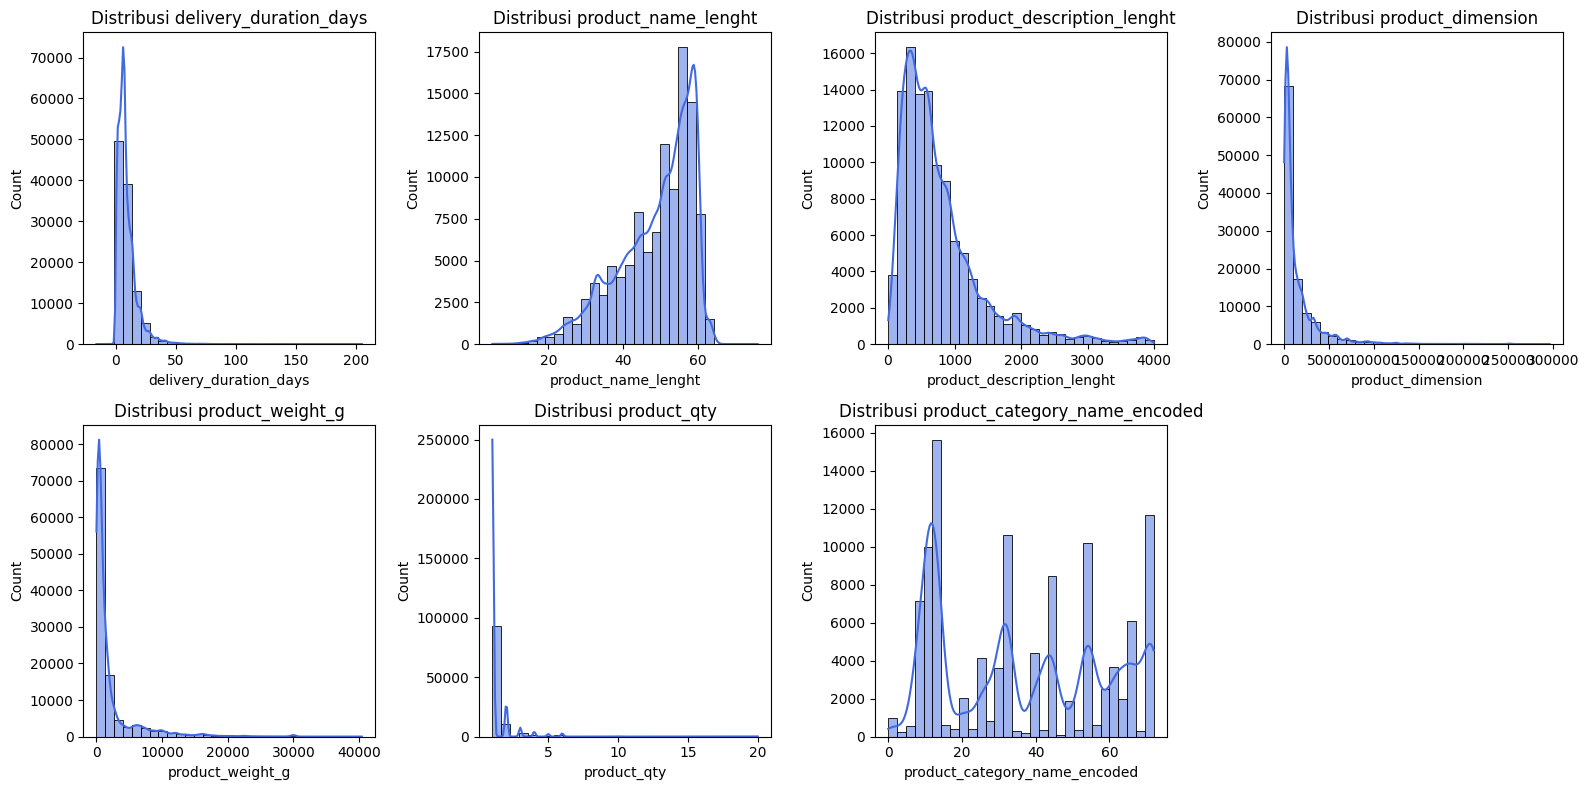

In [ ]:
all_columns = df.columns.tolist()
n_cols = 4
n_rows = -(-len(all_columns) // n_cols)

plt.figure(figsize=(16, 4 * n_rows))

for i, col in enumerate(all_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], bins=30, kde=True, color='royalblue')
    plt.title(f'Distribusi {col}')

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import skew, kurtosis

all_columns = df.select_dtypes(include=['number']).columns.tolist()

for col in all_columns:
    col_data = df[col].dropna()
    print(f"Skewness {col}: {skew(col_data)}")
    print(f"Kurtosis {col}: {kurtosis(col_data)}\n")

Skewness delivery_duration_days: 4.57826300744312
Kurtosis delivery_duration_days: 54.352821665559816

Skewness product_name_lenght: -0.9257980617156276
Kurtosis product_name_lenght: 0.21543005688583738

Skewness product_description_lenght: 2.0270956799847064
Kurtosis product_description_lenght: 5.026374394176427

Skewness product_dimension: 4.066364441194217
Kurtosis product_dimension: 25.62721737186134

Skewness product_weight_g: 3.597057404907774
Kurtosis product_weight_g: 16.253607820155246

Skewness product_qty: 7.144959732135385
Kurtosis product_qty: 87.53626867913238

Skewness product_category_name_encoded: 0.14565429070570307
Kurtosis product_category_name_encoded: -1.3926013530436723



In [ ]:
df_qty_simpan = df[['product_qty','delivery_duration_days','product_category_name_encoded']]
df_temp = df.drop(columns=['product_qty','delivery_duration_days','product_category_name_encoded'])

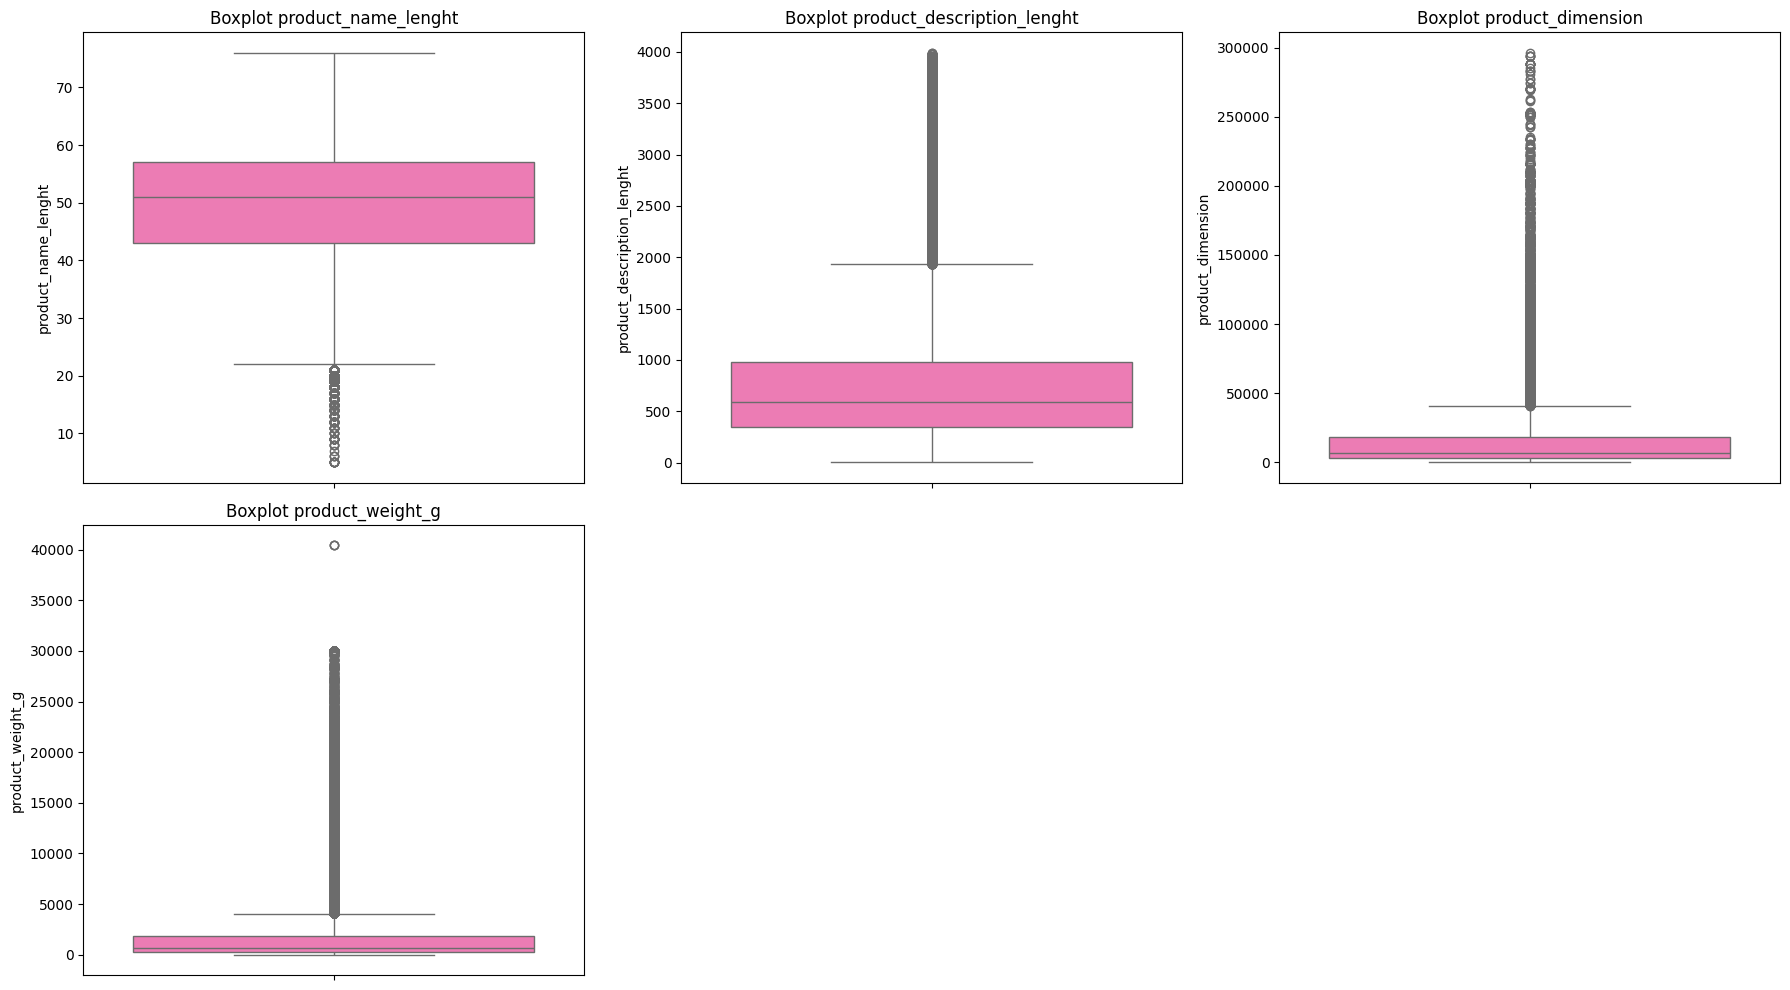

In [ ]:
numerik_cols = df_temp.select_dtypes(include=['float64', 'int64']).columns.tolist()

n_cols = 3
n_rows = -(-len(numerik_cols) // n_cols)

plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(numerik_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df_temp[col], color='hotpink')
    plt.title(f'Boxplot {col}')
    plt.tight_layout()

plt.show()

In [ ]:
def cap_outliers_iqr(df):
    df_capped = df_temp.copy()
    numeric_cols = df_capped.select_dtypes(include=['float64', 'int64']).columns

    for col in numeric_cols:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_capped[col] = np.where(df_capped[col] < lower_bound, lower_bound,
                           np.where(df_capped[col] > upper_bound, upper_bound, df_capped[col]))
    return df_capped

df_clean = cap_outliers_iqr(df_temp)

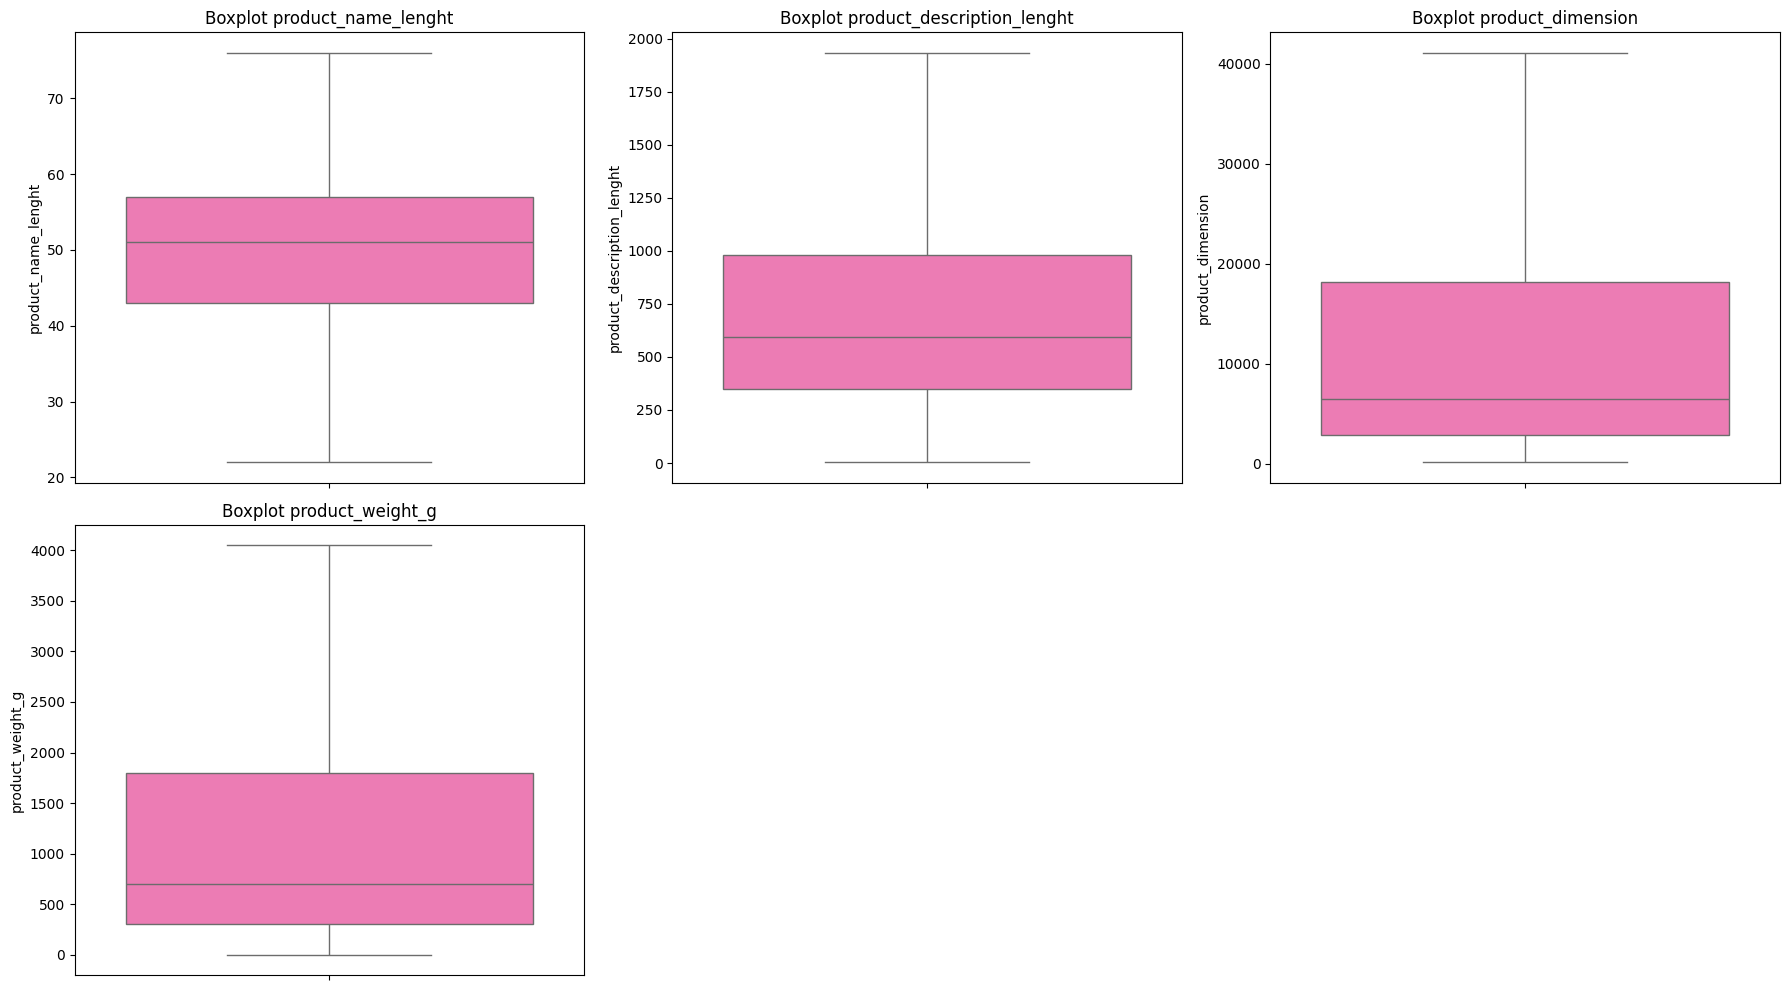

In [ ]:
numerik_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()

n_cols = 3
n_rows = -(-len(numerik_cols) // n_cols)

plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(numerik_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df_clean[col], color='hotpink')
    plt.title(f'Boxplot {col}')
    plt.tight_layout()

plt.show()

In [ ]:
print(df_clean.shape)

(110188, 4)


In [ ]:
df_clean[['product_qty', 'delivery_duration_days','product_category_name_encoded']] = df_qty_simpan.values

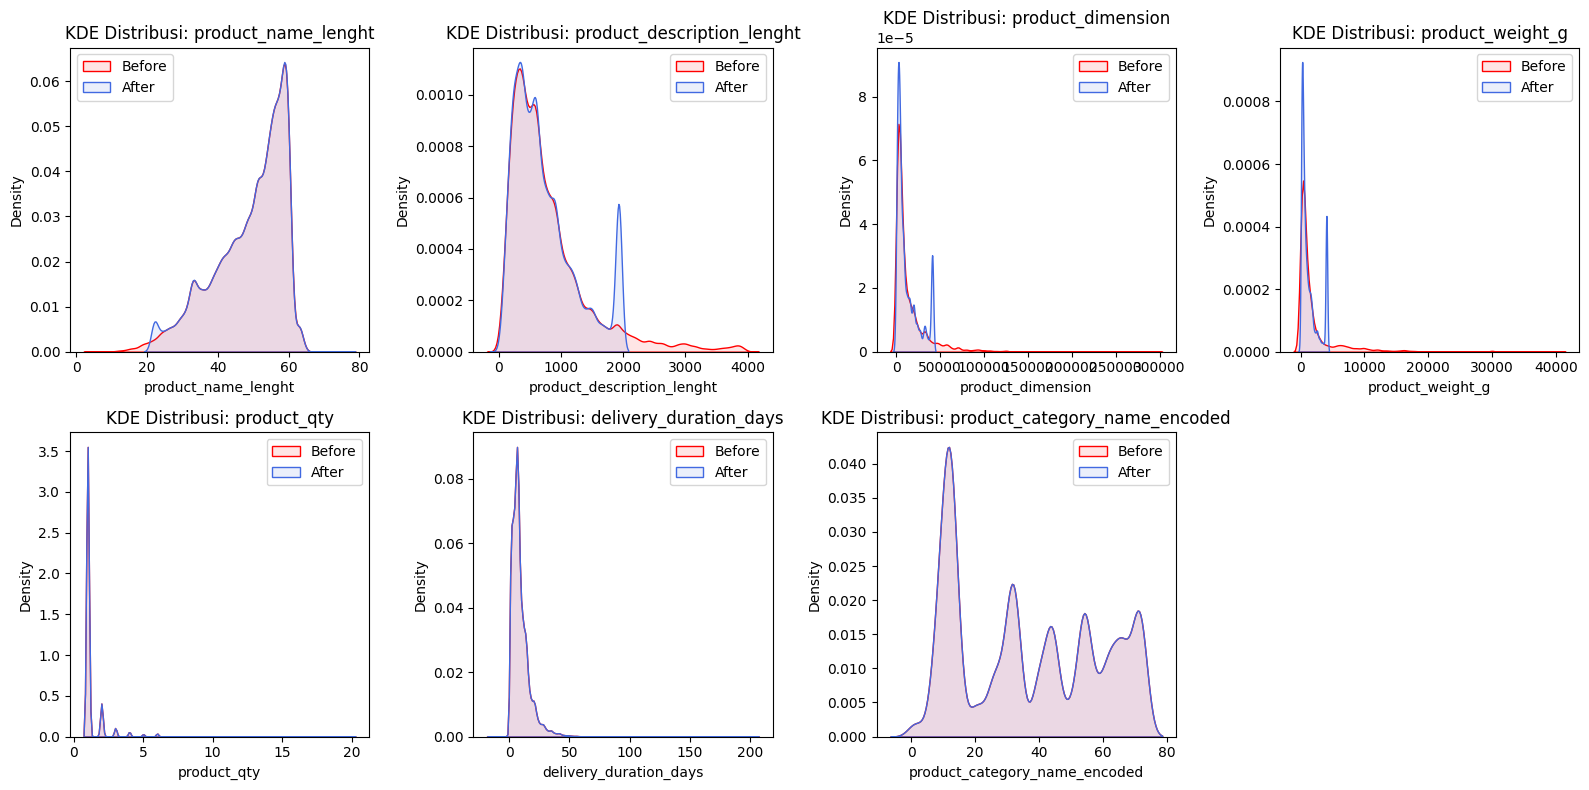

In [ ]:
all_columns = df_clean.columns.tolist()
n_cols = 4
n_rows = -(-len(all_columns) // n_cols)

plt.figure(figsize=(16, 4 * n_rows))

for i, col in enumerate(all_columns, 1):
    plt.subplot(n_rows, n_cols, i)

    sns.kdeplot(df[col], label='Before', fill=True, alpha=0.1, color='red')
    sns.kdeplot(df_clean[col], label='After', fill=True, alpha=0.1, color='royalblue')

    plt.title(f'KDE Distribusi: {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import skew, kurtosis

all_columns = df_clean.select_dtypes(include=['number']).columns.tolist()

for col in all_columns:
    print(f"Skewness {col}: {skew(df_clean[col].dropna())}")
    print(f"Kurtosis {col}: {kurtosis(df_clean[col].dropna())}")

Skewness product_name_lenght: -0.850851732346071
Kurtosis product_name_lenght: -0.11785007204893772
Skewness product_description_lenght: 1.0087397860663483
Kurtosis product_description_lenght: 0.15591810240001402
Skewness product_dimension: 1.208005740422457
Kurtosis product_dimension: 0.15020410914673832
Skewness product_weight_g: 1.1493422355448901
Kurtosis product_weight_g: -0.13710002686809375
Skewness product_qty: 7.144959732135385
Kurtosis product_qty: 87.53626867913238
Skewness delivery_duration_days: 4.57826300744312
Kurtosis delivery_duration_days: 54.352821665559816
Skewness product_category_name_encoded: 0.14565429070570307
Kurtosis product_category_name_encoded: -1.3926013530436723


In [ ]:
df_clean.to_csv("data_prepros_datmin.csv", index=False)

## **Preprocessing**

In [ ]:
df = pd.read_csv("data_prepros_datmin.csv")

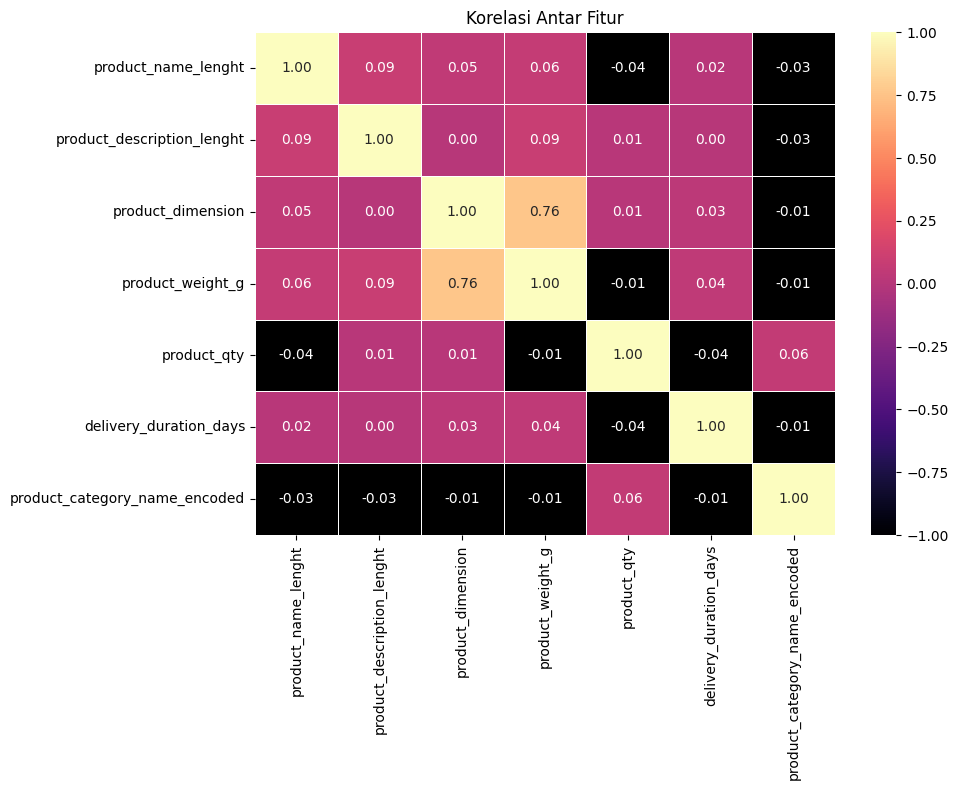

In [ ]:
correlation_matrix = df.corr(method='pearson')

mask = correlation_matrix <= 0
plt.figure(figsize=(10, 8))

sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap='magma',
    center=0,
    vmin=-1,
    vmax=1,
    # cbar=True,
    linewidths=0.5
    # linecolor='white'
)

sns.heatmap(
    correlation_matrix.where(mask),
    mask=~mask,
    cmap=["black"],
    cbar=False,
    annot=True,
    fmt=".2f",
    linewidths=0.5)

plt.title('Korelasi Antar Fitur')
plt.tight_layout()
plt.show()


Insight Temuan

- eksplor fitur lain yang punya korelasi lebih tinggi pada target
- fitur baru = dimensi product -> width * lenght * height
- untuk menjadi class baru -> menyatukan dimensi product dan beratnya  (classter) -> (lebel)
- output yang diharapkan -> ketika jita beli lgsg lalu mucul hari tanggal jam datang
- optional -> evaluasi pengiriman pertahun


# **Tes Ombak Model**

In [ ]:
!pip install torch torch_geometric

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

import torch
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

In [ ]:
df = pd.read_csv("data_prepros_datmin.csv")
df

,product_name_lenght,product_description_lenght,product_dimension,product_weight_g,product_qty,delivery_duration_days,product_category_name_encoded
0,58.0,598.0,3528.0,650.0,1.0,1.0,26.0
1,56.0,239.0,41085.0,4050.0,1.0,8.0,63.0
2,59.0,695.0,14157.0,3050.0,1.0,6.0,54.0
3,42.0,480.0,2400.0,200.0,1.0,4.0,62.0
4,59.0,409.0,41085.0,3750.0,1.0,13.0,40.0
...,...,...,...,...,...,...,...
110183,43.0,1002.0,41085.0,4050.0,1.0,15.0,72.0
110184,31.0,232.0,41085.0,4050.0,1.0,7.0,44.0
110185,43.0,869.0,9576.0,967.0,1.0,2.0,32.0
110186,56.0,1306.0,8000.0,100.0,1.0,1.0,44.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110188 entries, 0 to 110187
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   product_name_lenght            110188 non-null  float64
 1   product_description_lenght     110188 non-null  float64
 2   product_dimension              110188 non-null  float64
 3   product_weight_g               110188 non-null  float64
 4   product_qty                    110188 non-null  float64
 5   delivery_duration_days         110188 non-null  float64
 6   product_category_name_encoded  110188 non-null  float64
dtypes: float64(7)
memory usage: 5.9 MB


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

In [ ]:
df_sample = df.sample(n=1000, random_state=42).reset_index(drop=True)

In [ ]:
# Clustering based on volume and weight
cluster_features = df_sample[['product_dimension', 'product_weight_g']].values
scaler_cluster = StandardScaler()
cluster_features_scaled = scaler_cluster.fit_transform(cluster_features)
kmeans = KMeans(n_clusters=3, random_state=42)
df_sample['cluster'] = kmeans.fit_predict(cluster_features_scaled)

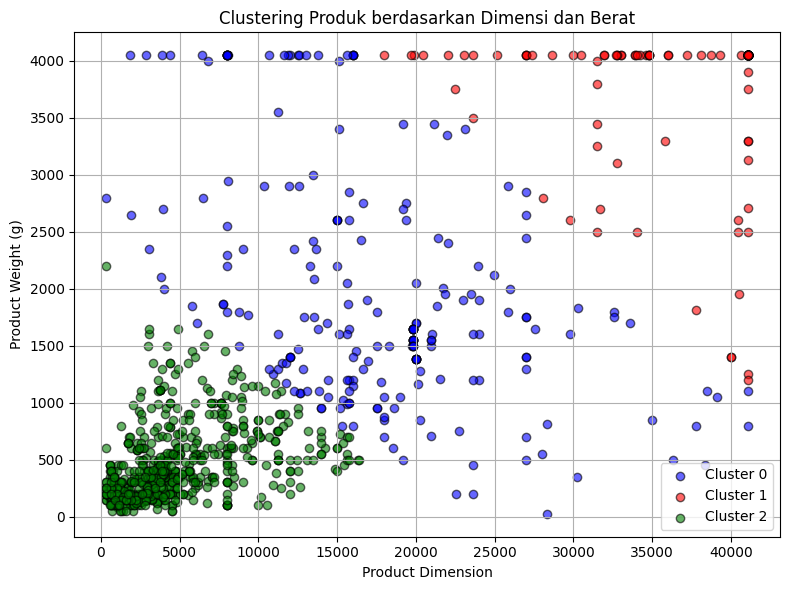

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot hasil klaster
plt.figure(figsize=(8, 6))

colors = ['blue', 'red', 'green']
for i in range(3):
    cluster_data = df_sample[df_sample['cluster'] == i]
    plt.scatter(
        cluster_data['product_dimension'],
        cluster_data['product_weight_g'],
        label=f'Cluster {i}',
        color=colors[i],
        alpha=0.6,
        edgecolor='black'
    )

plt.xlabel('Product Dimension')
plt.ylabel('Product Weight (g)')
plt.title('Clustering Produk berdasarkan Dimensi dan Berat')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
cluster_labels = {df_sample['cluster'].index[0]: 'HEAVY',
                 df_sample['cluster'].index[1]: 'NORMAL',
                 df_sample['cluster'].index[2]: 'LIGHT'}
df_sample['cluster_label'] = df_sample['cluster'].map(cluster_labels)

In [ ]:
df_sample['cluster_label'].value_counts()

,count
cluster_label,
LIGHT,633
HEAVY,220
NORMAL,147


In [ ]:
df_sample

,product_name_lenght,product_description_lenght,product_dimension,product_weight_g,product_qty,delivery_duration_days,product_category_name_encoded,cluster,cluster_label
0,57.0,1826.0,528.0,250.0,1.0,6.0,26.0,2,LIGHT
1,57.0,339.0,32560.0,1800.0,1.0,5.0,40.0,0,HEAVY
2,53.0,829.0,16000.0,4050.0,1.0,70.0,9.0,0,HEAVY
3,46.0,1157.0,41085.0,4050.0,3.0,3.0,55.0,1,NORMAL
4,34.0,826.0,12636.0,1084.0,1.0,3.0,1.0,0,HEAVY
...,...,...,...,...,...,...,...,...,...
995,64.0,946.0,12000.0,500.0,3.0,7.0,54.0,2,LIGHT
996,53.0,1933.0,1936.0,2650.0,1.0,10.0,21.0,0,HEAVY
997,36.0,957.0,1728.0,200.0,1.0,11.0,44.0,2,LIGHT
998,45.0,868.0,3960.0,175.0,1.0,5.0,30.0,2,LIGHT


In [ ]:
from imblearn.over_sampling import ADASYN

# Gunakan semua fitur numerik untuk ADASYN
features = ['product_name_lenght', 'product_description_lenght', 'product_dimension',
            'product_weight_g', 'product_qty', 'delivery_duration_days',
            'product_category_name_encoded']
X = df_sample[features]
y = df_sample['cluster']

# ADASYN
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Buat DataFrame hasil resample
df_resampled = pd.DataFrame(X_resampled, columns=features)
df_resampled['cluster'] = y_resampled

# Tambahkan cluster_label kembali
label_map = {0: 'LIGHT', 1: 'NORMAL', 2: 'HEAVY'}
df_resampled['cluster_label'] = df_resampled['cluster'].map(label_map)

# Cek hasilnya
print(df_resampled['cluster'].value_counts())

cluster
1    637
2    633
0    622
Name: count, dtype: int64


In [ ]:
df_sample = df_resampled.copy()

In [ ]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1892 entries, 0 to 1891
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_name_lenght            1892 non-null   float64
 1   product_description_lenght     1892 non-null   float64
 2   product_dimension              1892 non-null   float64
 3   product_weight_g               1892 non-null   float64
 4   product_qty                    1892 non-null   float64
 5   delivery_duration_days         1892 non-null   float64
 6   product_category_name_encoded  1892 non-null   float64
 7   cluster                        1892 non-null   int32  
 8   cluster_label                  1892 non-null   object 
dtypes: float64(7), int32(1), object(1)
memory usage: 125.8+ KB


In [ ]:
# features = ['product_name_lenght', 'product_description_lenght', 'cluster','product_category_name_encoded','product_qty']
features = ['product_name_lenght', 'product_description_lenght', 'cluster','product_category_name_encoded']

# X = df_sample[features].values
X = df_sample[features].div(df_sample['product_qty'], axis=0)
y = df_sample['delivery_duration_days'].values

# Standardisasi
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
cos_sim = cosine_similarity(X_scaled)
np.fill_diagonal(cos_sim, 0)
edge_index = np.argwhere(cos_sim > 0.95).T

edge_attr = torch.tensor(cos_sim[edge_index[0], edge_index[1]], dtype=torch.float)
edge_index = torch.tensor(edge_index, dtype=torch.long)

In [ ]:
pca = PCA(n_components=2)
pos_encoding = pca.fit_transform(X_scaled)
pos_encoding = torch.tensor(pos_encoding, dtype=torch.float)

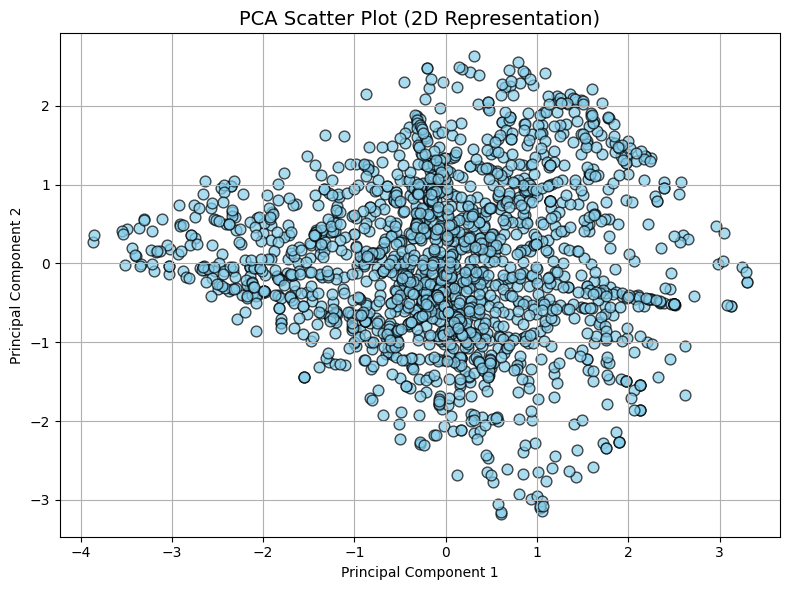

In [ ]:
import matplotlib.pyplot as plt

pos_encoding_np = pos_encoding.numpy()
plt.figure(figsize=(8, 6))
plt.scatter(pos_encoding_np[:, 0], pos_encoding_np[:, 1],
            c='skyblue', edgecolors='k', s=60, alpha=0.7)

plt.title('PCA Scatter Plot (2D Representation)', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
x = torch.tensor(X_scaled, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float).view(-1, 1)

data = Data(x=x, edge_index=edge_index, edge_attr=edge_attr, pos=pos_encoding, y=y)

In [ ]:
num_nodes = pos_encoding.shape[0]

train_idx, test_idx = train_test_split(np.arange(num_nodes), test_size=0.2, random_state=42)

data.train_mask = torch.zeros(num_nodes, dtype=torch.bool)
data.test_mask = torch.zeros(num_nodes, dtype=torch.bool)

data.train_mask[train_idx] = True
data.test_mask[test_idx] = True

In [ ]:
# train_idx, test_idx = train_test_split(np.arange(1892), test_size=0.2, random_state=42)
# data.train_mask = torch.zeros(1892, dtype=torch.bool)
# data.test_mask = torch.zeros(1892, dtype=torch.bool)
# data.train_mask[train_idx] = True
# data.test_mask[test_idx] = True

In [ ]:
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, dropout):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, 1)
        self.dropout = dropout

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index, edge_weight=data.edge_attr)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.conv2(x, edge_index, edge_weight=data.edge_attr)
        return x

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

hidden_sizes = [2,4,16, 32]
dropouts = [0.2, 0.4]
lrs = [0.2, 0.5]

best_r2 = -float('inf')
best_model = None
best_config = {}

for h in hidden_sizes:
    for d in dropouts:
        for lr in lrs:
            model = GCN(in_channels=x.shape[1], hidden_channels=h, dropout=d)
            optimizer = torch.optim.Adam(model.parameters(), lr=lr)
            loss_fn = torch.nn.MSELoss()

            for epoch in range(200):
                model.train()
                optimizer.zero_grad()
                out = model(data)
                loss = loss_fn(out[data.train_mask], data.y[data.train_mask])
                loss.backward()
                optimizer.step()

            model.eval()
            preds = model(data).detach()
            r2 = r2_score(data.y[data.test_mask].numpy(), preds[data.test_mask].numpy())

            if r2 > best_r2:
                best_r2 = r2
                best_model = model
                best_config = {"hidden": h, "dropout": d, "lr": lr}
                print(f"Updated Best R2={r2:.4f} | Hidden={h} | Dropout={d} | LR={lr}")

Updated Best R2=0.0477 | Hidden=2 | Dropout=0.2 | LR=0.2
Updated Best R2=0.1148 | Hidden=2 | Dropout=0.2 | LR=0.5
Updated Best R2=0.1223 | Hidden=4 | Dropout=0.2 | LR=0.5
Updated Best R2=0.1311 | Hidden=4 | Dropout=0.4 | LR=0.2
Updated Best R2=0.2112 | Hidden=4 | Dropout=0.4 | LR=0.5
Updated Best R2=0.2815 | Hidden=16 | Dropout=0.2 | LR=0.2
Updated Best R2=0.3081 | Hidden=16 | Dropout=0.2 | LR=0.5
Updated Best R2=0.3211 | Hidden=32 | Dropout=0.2 | LR=0.5


Epoch 0, Loss: 248.3033
Epoch 10, Loss: 154.4310
Epoch 20, Loss: 135.0861
Epoch 30, Loss: 131.3504
Epoch 40, Loss: 125.9060
Epoch 50, Loss: 124.8887
Epoch 60, Loss: 124.2678
Epoch 70, Loss: 120.1340
Epoch 80, Loss: 122.1270
Epoch 90, Loss: 113.0123
Epoch 100, Loss: 115.4480
Epoch 110, Loss: 116.1996
Epoch 120, Loss: 111.5890
Epoch 130, Loss: 110.6718
Epoch 140, Loss: 111.5935
Epoch 150, Loss: 106.9916
Epoch 160, Loss: 109.2712
Epoch 170, Loss: 113.7120
Epoch 180, Loss: 107.9521
Epoch 190, Loss: 108.0412


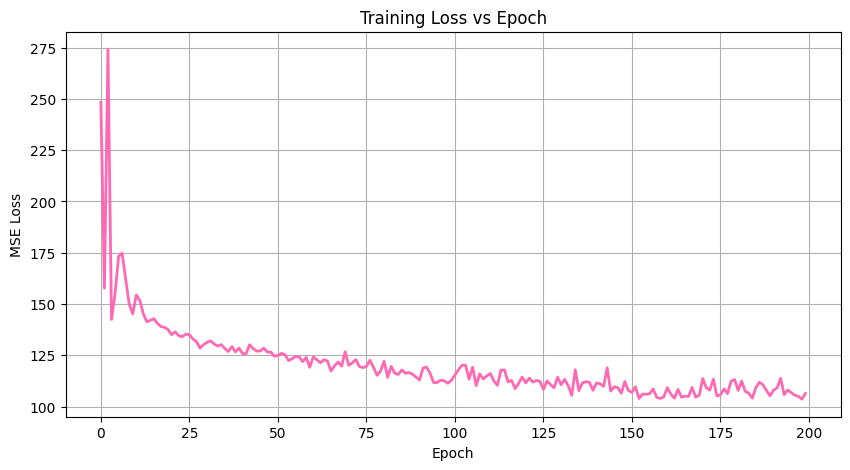

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = GCN(in_channels=x.shape[1],
            hidden_channels=best_config["hidden"],
            dropout=best_config["dropout"])
model = model.to(device)
data = data.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=best_config["lr"])

loss_fn = torch.nn.MSELoss()
loss_history = []

model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data)
    loss = loss_fn(out, data.y)
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(loss_history, color='hotpink', linewidth=2)
plt.title('Training Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.show()

In [ ]:
# Evaluating and predicting delivery durations per cluster
model.eval()
with torch.no_grad():
    final_preds = model(data).detach().cpu().numpy().flatten()
    final_labels = data.y.cpu().numpy().flatten()

final_preds=np.ceil(final_preds)
df_sample['predicted_duration'] = final_preds

# Calculating average predicted duration per cluster
cluster_durations = df_sample.groupby('cluster_label')['predicted_duration'].mean()
print("\nAverage Predicted Delivery Duration by Cluster:")
for label, duration in cluster_durations.items():
    print(f"{label}: {round(duration)} days")

Average Predicted Delivery Duration by Cluster:
HEAVY: 10 days
LIGHT: 6 days
NORMAL: 7 days


In [ ]:
df_sample

,product_name_lenght,product_description_lenght,product_dimension,product_weight_g,product_qty,delivery_duration_days,product_category_name_encoded,cluster,cluster_label,predicted_duration
0,57.000000,1826.000000,528.000000,250.00000,1.000000,6.000000,26.000000,2,HEAVY,7.0
1,57.000000,339.000000,32560.000000,1800.00000,1.000000,5.000000,40.000000,0,LIGHT,13.0
2,53.000000,829.000000,16000.000000,4050.00000,1.000000,70.000000,9.000000,0,LIGHT,10.0
3,46.000000,1157.000000,41085.000000,4050.00000,3.000000,3.000000,55.000000,1,NORMAL,10.0
4,34.000000,826.000000,12636.000000,1084.00000,1.000000,3.000000,1.000000,0,LIGHT,17.0
...,...,...,...,...,...,...,...,...,...,...
1887,51.044039,615.960055,22385.022947,4050.00000,1.669603,12.356821,60.026424,1,NORMAL,10.0
1888,41.699316,405.321861,23210.576646,4050.00000,1.000000,8.188837,52.041915,1,NORMAL,12.0
1889,53.803364,329.782336,23423.134374,4050.00000,1.000000,8.920505,28.393271,1,NORMAL,10.0
1890,46.694096,374.223615,23216.113712,3900.86891,1.000000,8.084590,42.882955,1,NORMAL,14.0


In [ ]:
def categorize_duration(duration):
    if duration <= 3:
        return 0  # Cepat
    elif duration <= 7:
        return 1  # Sedang
    else:
        return 2  # Lama

y_true_cls = df_sample['delivery_duration_days'].apply(categorize_duration).values
y_pred_cls = df_sample['predicted_duration'].round().apply(categorize_duration).values

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

mcm = multilabel_confusion_matrix(y_true_cls, y_pred_cls)
labels = ["LAMBAT", "SEDANG", "CEPAT"]

print("=== Confusion Matrix & Accuracy per Label ===")
for i, label in enumerate(labels):
    tn, fp, fn, tp = mcm[i].ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)

    print(f"\nLabel: {label}")
    print(f"  True Positive (TP): {tp}")
    print(f"  False Positive (FP): {fp}")
    print(f"  False Negative (FN): {fn}")
    print(f"  True Negative (TN): {tn}")
    print(f"  Accuracy for {label}: {accuracy * 100:.2f}%")

# Akurasi keseluruhan (macro)
overall_accuracy = accuracy_score(y_true_cls, y_pred_cls)
print(f"\n=== Overall Accuracy: {overall_accuracy * 100:.2f}% ===")


=== Confusion Matrix & Accuracy per Label ===

Label: LAMBAT
  True Positive (TP): 0
  False Positive (FP): 0
  False Negative (FN): 272
  True Negative (TN): 1620
  Accuracy for LAMBAT: 85.62%

Label: SEDANG
  True Positive (TP): 38
  False Positive (FP): 64
  False Negative (FN): 588
  True Negative (TN): 1202
  Accuracy for SEDANG: 65.54%

Label: CEPAT
  True Positive (TP): 958
  False Positive (FP): 832
  False Negative (FN): 36
  True Negative (TN): 66
  Accuracy for CEPAT: 54.12%

=== Overall Accuracy: 52.64% ===


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true_cls, y_pred_cls, target_names=labels))

              precision    recall  f1-score   support

      LAMBAT       0.00      0.00      0.00       272
      SEDANG       0.37      0.06      0.10       626
       CEPAT       0.54      0.96      0.69       994

    accuracy                           0.53      1892
   macro avg       0.30      0.34      0.26      1892
weighted avg       0.40      0.53      0.40      1892



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **CANDI GNN**

In [ ]:
!pip install torch torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd

In [ ]:
df_turis=pd.read_csv("data_prepros_datmin.csv")

In [ ]:
df = df_turis.sample(n=1000, random_state=42).reset_index(drop=True)

In [ ]:
class GCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, dropout):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, 1)
        self.dropout = dropout

    def forward(self, data):
        x, edge_index, edge_weight = data.x, data.edge_index, data.edge_attr
        x = self.conv1(x, edge_index, edge_weight=edge_weight)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.conv2(x, edge_index, edge_weight=edge_weight)
        return x

class Candi_GNN:
    def __init__(self, df):
        self.df = df

    def KlasterKarakteristikBarang(self):
        cluster_features = self.df[['product_dimension', 'product_weight_g']].values
        scaler = StandardScaler()
        cluster_features_scaled = scaler.fit_transform(cluster_features)
        kmeans = KMeans(n_clusters=3, random_state=42)
        self.df['cluster'] = kmeans.fit_predict(cluster_features_scaled)
        cluster_labels = {df['cluster'].index[0]: 'HEAVY',
                 df['cluster'].index[1]: 'NORMAL',
                 df['cluster'].index[2]: 'LIGHT'}
        self.df['cluster_label'] = self.df['cluster'].map(cluster_labels)
        return self.df

    def undersampling(self):
        from imblearn.over_sampling import ADASYN

        features = ['product_name_lenght', 'product_description_lenght', 'product_dimension',
                    'product_weight_g', 'product_qty', 'delivery_duration_days',
                    'product_category_name_encoded']
        X = self.df[features]
        y = self.df['cluster']
        adasyn = ADASYN(random_state=42)
        X_resampled, y_resampled = adasyn.fit_resample(X, y)
        df_resampled = pd.DataFrame(X_resampled, columns=features)
        df_resampled['cluster'] = y_resampled
        label_map = {0: 'LIGHT', 1: 'NORMAL', 2: 'HEAVY'}
        df_resampled['cluster_label'] = df_resampled['cluster'].map(label_map)
        self.df_resampled = df_resampled
        return df_resampled

    def StupaGNN(self):
        features = ['product_name_lenght', 'product_description_lenght', 'cluster', 'product_category_name_encoded']
        df = self.df_resampled.copy()
        X = df[features].div(df['product_qty'], axis=0)
        y = df['delivery_duration_days'].values
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        self.X_scaled = X_scaled
        self.y = y
        return X_scaled, y

    def BuarlokaGNN(self):
        cos_sim = cosine_similarity(self.X_scaled)
        np.fill_diagonal(cos_sim, 0)
        edge_index = np.argwhere(cos_sim > 0.95).T
        edge_attr = torch.tensor(cos_sim[edge_index[0], edge_index[1]], dtype=torch.float)
        edge_index = torch.tensor(edge_index, dtype=torch.long)

        pca = PCA(n_components=2)
        pos_encoding = pca.fit_transform(self.X_scaled)
        pos_encoding = torch.tensor(pos_encoding, dtype=torch.float)

        x = torch.tensor(self.X_scaled, dtype=torch.float)
        y = torch.tensor(self.y, dtype=torch.float).view(-1, 1)

        data = Data(x=x, edge_index=edge_index, edge_attr=edge_attr, pos=pos_encoding, y=y)

        num_nodes = x.shape[0]
        train_idx, test_idx = train_test_split(np.arange(num_nodes), test_size=0.2, random_state=42)

        data.train_mask = torch.zeros(num_nodes, dtype=torch.bool)
        data.test_mask = torch.zeros(num_nodes, dtype=torch.bool)
        data.train_mask[train_idx] = True
        data.test_mask[test_idx] = True

        self.data = data
        return data

    def model(self):
        hidden_sizes = [16, 32]
        dropouts = [0.2, 0.4]
        lrs = [0.2, 0.5]
        x = self.data.x
        best_r2 = -float('inf')

        for h in hidden_sizes:
            for d in dropouts:
                for lr in lrs:
                    model = GCN(in_channels=x.shape[1], hidden_channels=h, dropout=d)
                    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
                    loss_fn = nn.MSELoss()
                    for epoch in range(100):
                        model.train()
                        optimizer.zero_grad()
                        out = model(self.data)
                        loss = loss_fn(out[self.data.train_mask], self.data.y[self.data.train_mask])
                        loss.backward()
                        optimizer.step()
                    model.eval()
                    preds = model(self.data).detach()
                    r2 = r2_score(self.data.y[self.data.test_mask].numpy(),
                                  preds[self.data.test_mask].numpy())
                    if r2 > best_r2:
                        best_r2 = r2
                        self.best_model = model
                        self.best_config = {"hidden": h, "dropout": d, "lr": lr}

    def model_terbaik(self):
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        x = self.data.x
        model = GCN(in_channels=x.shape[1],
                    hidden_channels=self.best_config["hidden"],
                    dropout=self.best_config["dropout"]).to(device)
        self.data = self.data.to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=self.best_config["lr"])
        loss_fn = nn.MSELoss()

        for epoch in range(100):
            model.train()
            optimizer.zero_grad()
            out = model(self.data)
            loss = loss_fn(out, self.data.y)
            loss.backward()
            optimizer.step()

        self.final_model = model

    def Evaluasi_Candi(self):
        self.final_model.eval()
        pred = self.final_model(self.data).detach().cpu().numpy().flatten()
        true = self.data.y.cpu().numpy().flatten()
        r2 = r2_score(true, pred)

        pred_asli = pred[:len(self.df)]
        self.df = self.df.reset_index(drop=True)
        pred_asli_int = pred_asli.round().astype(int)
        self.df["predicted_duration"] = pred_asli_int
        def kategori_durasi_pengiriman(durasi):
            if durasi <= 3:
                return "CEPAT"
            elif 3 < durasi <= 7:
                return "SEDANG"
            else:
                return "LAMBAT"

        self.df["kategori_prediksi"] = self.df["predicted_duration"].apply(kategori_durasi_pengiriman)

candi = Candi_GNN(df)
candi.KlasterKarakteristikBarang()
candi.undersampling()
candi.StupaGNN()
candi.BuarlokaGNN()
candi.model()
candi.model_terbaik()
candi.Evaluasi_Candi()

In [ ]:
candi.df

,product_name_lenght,product_description_lenght,product_dimension,product_weight_g,product_qty,delivery_duration_days,product_category_name_encoded,cluster,cluster_label,predicted_duration,kategori_prediksi
0,48.0,763.0,41085.0,4050.0,1,9,72,1,NORMAL,9,LAMBAT
1,33.0,374.0,4500.0,304.0,1,5,11,2,LIGHT,9,LAMBAT
2,57.0,188.0,3080.0,1100.0,1,3,13,2,LIGHT,9,LAMBAT
3,48.0,1930.5,2805.0,200.0,2,12,32,2,LIGHT,10,LAMBAT
4,60.0,420.0,30888.0,4050.0,1,1,54,1,NORMAL,9,LAMBAT
...,...,...,...,...,...,...,...,...,...,...,...
995,58.0,696.0,13125.0,750.0,1,29,54,2,LIGHT,9,LAMBAT
996,43.0,447.0,2574.0,586.0,1,3,26,2,LIGHT,10,LAMBAT
997,50.0,845.0,2700.0,200.0,1,2,70,2,LIGHT,8,LAMBAT
998,33.0,1930.5,8000.0,4050.0,1,20,40,0,HEAVY,8,LAMBAT


In [ ]:
candi.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_name_lenght            1000 non-null   float64
 1   product_category_name          979 non-null    object 
 2   product_description_lenght     1000 non-null   float64
 3   product_dimension              1000 non-null   float64
 4   product_weight_g               1000 non-null   float64
 5   delivery_order_days            1000 non-null   float64
 6   product_qty                    1000 non-null   float64
 7   delivery_duration_days         1000 non-null   float64
 8   product_category_name_encoded  1000 non-null   float64
 9   cluster                        1000 non-null   int32  
 10  cluster_label                  1000 non-null   object 
 11  predicted_duration             1000 non-null   int64  
 12  kategori_prediksi              1000 non-null   ob

# Prediksi Waktu Pengiriman Sesuai Jenis Barang

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd

In [ ]:
df_full = pd.read_csv("data_bersih_datmin.csv")

In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110173 entries, 0 to 110172
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    110173 non-null  object 
 1   order_item_id               110173 non-null  int64  
 2   product_id                  110173 non-null  object 
 3   seller_id                   110173 non-null  object 
 4   shipping_limit_date         110173 non-null  object 
 5   price                       110173 non-null  float64
 6   freight_value               110173 non-null  float64
 7   product_category_name       110173 non-null  object 
 8   product_name_lenght         110173 non-null  float64
 9   product_description_lenght  110173 non-null  float64
 10  product_photos_qty          110173 non-null  float64
 11  product_weight_g            110173 non-null  float64
 12  product_length_cm           110173 non-null  float64
 13  product_height

In [ ]:
selected_features = [
    'delivery_duration_days',
    'product_name_lenght',
    'product_category_name',
    'product_description_lenght',
    'product_dimension',
    'product_weight_g',
    'product_qty',
    'order_approved_at']

df_dataset = df_full[selected_features].copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_dataset["product_category_name_encoded"] = le.fit_transform(df_dataset["product_category_name"])

# Membuat mapping kategori dengan format angka sebagai kunci
category_mapping = {index: category for index, category in enumerate(le.classes_)}
for key, value in category_mapping.items():
    print(f"{key}: '{value}'")

0: 'agro_industria_e_comercio'
1: 'alimentos'
2: 'alimentos_bebidas'
3: 'artes'
4: 'artes_e_artesanato'
5: 'artigos_de_festas'
6: 'artigos_de_natal'
7: 'audio'
8: 'automotivo'
9: 'bebes'
10: 'bebidas'
11: 'beleza_saude'
12: 'brinquedos'
13: 'cama_mesa_banho'
14: 'casa_conforto'
15: 'casa_conforto_2'
16: 'casa_construcao'
17: 'cds_dvds_musicais'
18: 'cine_foto'
19: 'climatizacao'
20: 'consoles_games'
21: 'construcao_ferramentas_construcao'
22: 'construcao_ferramentas_ferramentas'
23: 'construcao_ferramentas_iluminacao'
24: 'construcao_ferramentas_jardim'
25: 'construcao_ferramentas_seguranca'
26: 'cool_stuff'
27: 'dvds_blu_ray'
28: 'eletrodomesticos'
29: 'eletrodomesticos_2'
30: 'eletronicos'
31: 'eletroportateis'
32: 'esporte_lazer'
33: 'fashion_bolsas_e_acessorios'
34: 'fashion_calcados'
35: 'fashion_esporte'
36: 'fashion_roupa_feminina'
37: 'fashion_roupa_infanto_juvenil'
38: 'fashion_roupa_masculina'
39: 'fashion_underwear_e_moda_praia'
40: 'ferramentas_jardim'
41: 'flores'
42: 'fra

In [ ]:
df_dataset.drop(columns=['product_category_name'], inplace=True)

In [ ]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110173 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   delivery_duration_days         110173 non-null  float64       
 1   product_name_lenght            110173 non-null  float64       
 2   product_description_lenght     110173 non-null  float64       
 3   product_dimension              110173 non-null  float64       
 4   product_weight_g               110173 non-null  float64       
 5   product_qty                    110173 non-null  int64         
 6   order_approved_at              110173 non-null  datetime64[ns]
 7   product_category_name_encoded  110173 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 7.6 MB


In [ ]:
df_dataset['order_approved_at'] = pd.to_datetime(df_dataset['order_approved_at'], errors='coerce')

In [ ]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110173 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   delivery_duration_days         110173 non-null  float64       
 1   product_name_lenght            110173 non-null  float64       
 2   product_description_lenght     110173 non-null  float64       
 3   product_dimension              110173 non-null  float64       
 4   product_weight_g               110173 non-null  float64       
 5   product_qty                    110173 non-null  int64         
 6   order_approved_at              110173 non-null  datetime64[ns]
 7   product_category_name_encoded  110173 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 7.6 MB


In [ ]:
df = df_dataset.sample(n=1000, random_state=42).reset_index(drop=True)

In [ ]:
class GCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, dropout):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, 1)
        self.dropout = dropout

    def forward(self, data):
        x, edge_index, edge_weight = data.x, data.edge_index, data.edge_attr
        x = self.conv1(x, edge_index, edge_weight=edge_weight)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.conv2(x, edge_index, edge_weight=edge_weight)
        return x

class Candi_GNN:
    def __init__(self, df):
        self.df = df

    def KlasterKarakteristikBarang(self):
        cluster_features = self.df[['product_dimension', 'product_weight_g']].values
        scaler = StandardScaler()
        cluster_features_scaled = scaler.fit_transform(cluster_features)
        kmeans = KMeans(n_clusters=3, random_state=42)
        self.df['cluster'] = kmeans.fit_predict(cluster_features_scaled)
        cluster_labels = {df['cluster'].index[0]: 'HEAVY',
                 df['cluster'].index[1]: 'NORMAL',
                 df['cluster'].index[2]: 'LIGHT'}
        self.df['cluster_label'] = self.df['cluster'].map(cluster_labels)
        return self.df

    def undersampling(self):
        from imblearn.over_sampling import ADASYN

        features = ['product_name_lenght', 'product_description_lenght', 'product_dimension',
                    'product_weight_g', 'product_qty', 'delivery_duration_days',
                    'product_category_name_encoded']
        X = self.df[features]
        y = self.df['cluster']
        adasyn = ADASYN(random_state=42)
        X_resampled, y_resampled = adasyn.fit_resample(X, y)
        df_resampled = pd.DataFrame(X_resampled, columns=features)
        df_resampled['cluster'] = y_resampled
        label_map = {0: 'LIGHT', 1: 'NORMAL', 2: 'HEAVY'}
        df_resampled['cluster_label'] = df_resampled['cluster'].map(label_map)
        self.df_resampled = df_resampled
        return df_resampled

    def StupaGNN(self):
        features = ['product_name_lenght', 'product_description_lenght', 'cluster', 'product_category_name_encoded']
        df = self.df_resampled.copy()
        X = df[features].div(df['product_qty'], axis=0)
        y = df['delivery_duration_days'].values
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        self.X_scaled = X_scaled
        self.y = y
        return X_scaled, y

    def BuarlokaGNN(self):
        cos_sim = cosine_similarity(self.X_scaled)
        np.fill_diagonal(cos_sim, 0)
        edge_index = np.argwhere(cos_sim > 0.95).T
        edge_attr = torch.tensor(cos_sim[edge_index[0], edge_index[1]], dtype=torch.float)
        edge_index = torch.tensor(edge_index, dtype=torch.long)

        pca = PCA(n_components=2)
        pos_encoding = pca.fit_transform(self.X_scaled)
        pos_encoding = torch.tensor(pos_encoding, dtype=torch.float)

        x = torch.tensor(self.X_scaled, dtype=torch.float)
        y = torch.tensor(self.y, dtype=torch.float).view(-1, 1)

        data = Data(x=x, edge_index=edge_index, edge_attr=edge_attr, pos=pos_encoding, y=y)

        num_nodes = x.shape[0]
        train_idx, test_idx = train_test_split(np.arange(num_nodes), test_size=0.2, random_state=42)

        data.train_mask = torch.zeros(num_nodes, dtype=torch.bool)
        data.test_mask = torch.zeros(num_nodes, dtype=torch.bool)
        data.train_mask[train_idx] = True
        data.test_mask[test_idx] = True

        self.data = data
        return data

    def model(self):
        hidden_sizes = [16, 32]
        dropouts = [0.2, 0.4]
        lrs = [0.2, 0.5]
        x = self.data.x
        best_r2 = -float('inf')

        for h in hidden_sizes:
            for d in dropouts:
                for lr in lrs:
                    model = GCN(in_channels=x.shape[1], hidden_channels=h, dropout=d)
                    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
                    loss_fn = nn.MSELoss()
                    for epoch in range(100):
                        model.train()
                        optimizer.zero_grad()
                        out = model(self.data)
                        loss = loss_fn(out[self.data.train_mask], self.data.y[self.data.train_mask])
                        loss.backward()
                        optimizer.step()
                    model.eval()
                    preds = model(self.data).detach()
                    r2 = r2_score(self.data.y[self.data.test_mask].numpy(),
                                  preds[self.data.test_mask].numpy())
                    if r2 > best_r2:
                        best_r2 = r2
                        self.best_model = model
                        self.best_config = {"hidden": h, "dropout": d, "lr": lr}

    def model_terbaik(self):
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        x = self.data.x
        model = GCN(in_channels=x.shape[1],
                    hidden_channels=self.best_config["hidden"],
                    dropout=self.best_config["dropout"]).to(device)
        self.data = self.data.to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=self.best_config["lr"])
        loss_fn = nn.MSELoss()

        for epoch in range(100):
            model.train()
            optimizer.zero_grad()
            out = model(self.data)
            loss = loss_fn(out, self.data.y)
            loss.backward()
            optimizer.step()

        self.final_model = model

    def Evaluasi_Candi(self):
        self.final_model.eval()
        pred = self.final_model(self.data).detach().cpu().numpy().flatten()
        true = self.data.y.cpu().numpy().flatten()
        r2 = r2_score(true, pred)

        pred_asli = pred[:len(self.df)]
        self.df = self.df.reset_index(drop=True)
        pred_asli_int = pred_asli.round().astype(int)
        self.df["predicted_duration"] = pred_asli_int
        def kategori_durasi_pengiriman(durasi):
            if durasi <= 3:
                return "CEPAT"
            elif 3 < durasi <= 7:
                return "SEDANG"
            else:
                return "LAMBAT"

        self.df["kategori_prediksi"] = self.df["predicted_duration"].apply(kategori_durasi_pengiriman)

candi = Candi_GNN(df)
candi.KlasterKarakteristikBarang()
candi.undersampling()
candi.StupaGNN()
candi.BuarlokaGNN()
candi.model()
candi.model_terbaik()
candi.Evaluasi_Candi()

In [ ]:
candi.df.to_csv("hasil_prediksi_waktu_pengiriman.csv", index=False)
candi.df

,delivery_duration_days,product_name_lenght,product_description_lenght,product_dimension,product_weight_g,product_qty,order_approved_at,product_category_name_encoded,cluster,cluster_label,predicted_duration,kategori_prediksi
0,9.0,48.0,763.0,42875.0,8600.0,1,2018-02-28 12:48:28,72,0,HEAVY,7,SEDANG
1,5.0,33.0,374.0,4500.0,304.0,1,2017-10-25 17:35:39,11,2,LIGHT,9,LAMBAT
2,3.0,57.0,188.0,3080.0,1100.0,1,2017-04-03 10:35:21,13,2,LIGHT,7,SEDANG
3,12.0,48.0,1936.0,2805.0,200.0,2,2018-03-21 10:50:19,32,2,LIGHT,8,LAMBAT
4,1.0,60.0,420.0,30888.0,8000.0,1,2018-06-19 14:57:13,54,0,HEAVY,7,SEDANG
...,...,...,...,...,...,...,...,...,...,...,...,...
995,29.0,58.0,696.0,13125.0,750.0,1,2018-03-27 03:50:38,54,2,LIGHT,8,LAMBAT
996,3.0,43.0,447.0,2574.0,586.0,1,2017-12-24 03:56:26,26,2,LIGHT,8,LAMBAT
997,2.0,50.0,845.0,2700.0,200.0,1,2018-08-24 09:50:20,70,2,LIGHT,8,LAMBAT
998,20.0,33.0,2188.0,8000.0,7650.0,1,2018-02-27 21:48:36,40,0,HEAVY,9,LAMBAT


In [ ]:
df=pd.read_csv("hasil_prediksi_waktu_pengiriman.csv")

In [ ]:
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df

,delivery_duration_days,product_name_lenght,product_description_lenght,product_dimension,product_weight_g,product_qty,order_approved_at,product_category_name_encoded,cluster,cluster_label,predicted_duration,kategori_prediksi
0,9.0,48.0,763.0,42875.0,8600.0,1,2018-02-28 12:48:28,72,0,HEAVY,7,SEDANG
1,5.0,33.0,374.0,4500.0,304.0,1,2017-10-25 17:35:39,11,2,LIGHT,9,LAMBAT
2,3.0,57.0,188.0,3080.0,1100.0,1,2017-04-03 10:35:21,13,2,LIGHT,7,SEDANG
3,12.0,48.0,1936.0,2805.0,200.0,2,2018-03-21 10:50:19,32,2,LIGHT,8,LAMBAT
4,1.0,60.0,420.0,30888.0,8000.0,1,2018-06-19 14:57:13,54,0,HEAVY,7,SEDANG
...,...,...,...,...,...,...,...,...,...,...,...,...
995,29.0,58.0,696.0,13125.0,750.0,1,2018-03-27 03:50:38,54,2,LIGHT,8,LAMBAT
996,3.0,43.0,447.0,2574.0,586.0,1,2017-12-24 03:56:26,26,2,LIGHT,8,LAMBAT
997,2.0,50.0,845.0,2700.0,200.0,1,2018-08-24 09:50:20,70,2,LIGHT,8,LAMBAT
998,20.0,33.0,2188.0,8000.0,7650.0,1,2018-02-27 21:48:36,40,0,HEAVY,9,LAMBAT


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   delivery_duration_days         1000 non-null   float64       
 1   product_name_lenght            1000 non-null   float64       
 2   product_description_lenght     1000 non-null   float64       
 3   product_dimension              1000 non-null   float64       
 4   product_weight_g               1000 non-null   float64       
 5   product_qty                    1000 non-null   int64         
 6   order_approved_at              1000 non-null   datetime64[ns]
 7   product_category_name_encoded  1000 non-null   int64         
 8   cluster                        1000 non-null   int64         
 9   cluster_label                  1000 non-null   object        
 10  predicted_duration             1000 non-null   int64         
 11  kategori_prediksi 

In [ ]:
!pip install pmdarima

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
data = pd.read_csv('hasil_prediksi_waktu_pengiriman.csv')

In [ ]:
data['order_approved_at'] = pd.to_datetime(data['order_approved_at'], errors='coerce')

In [ ]:
data['year'] = data['order_approved_at'].dt.year

In [ ]:
#menggabungkan kolom produk_qty berdasarkan tahun
penjualan = data.groupby('year')['product_qty'].sum().reset_index()

In [ ]:
tahun = pd.Series(penjualan['product_qty'].values, index=penjualan['year'])

In [ ]:
if len(tahun) < 2:
    print("Data tidak cukup untuk forecasting. Minimal 2 tahun data diperlukan.")
    exit()

model = ARIMA(tahun, order=(1, 1, 1))
model_fit = model.fit()

prediksi_step = 2
prediksi = model_fit.forecast(steps=prediksi_step)

prediksi_tahun = range(int(tahun.index[-1]) + 1, int(tahun.index[-1]) + 1 + prediksi_step)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA

Prediksi penjualan tahunan untuk 2 tahun ke depan:
Tahun 2019: 785.48 unit
Tahun 2020: 801.93 unit


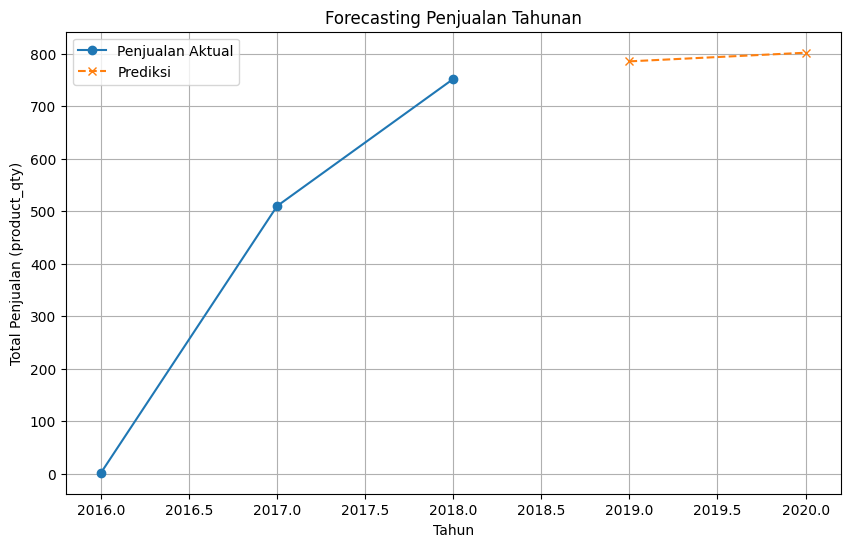

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(tahun.index, tahun, label='Penjualan Aktual', marker='o')
plt.plot(prediksi_tahun, prediksi, label='Prediksi', marker='x', linestyle='--')
plt.title('Forecasting Penjualan Tahunan')
plt.xlabel('Tahun')
plt.ylabel('Total Penjualan (product_qty)')
plt.legend()
plt.grid(True)

print("Prediksi penjualan tahunan untuk 2 tahun ke depan:")
for year, value in zip(prediksi_tahun, prediksi):
    print(f"Tahun {year}: {value:.2f} unit")